Fri Jun  9 13:28:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

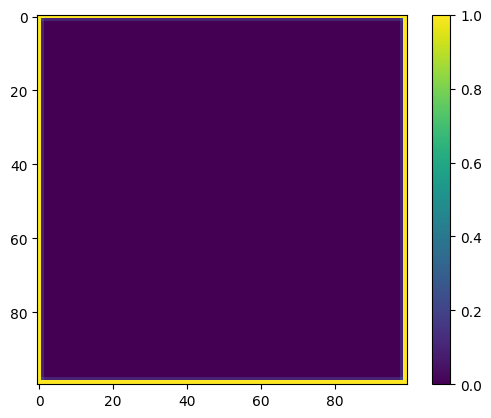

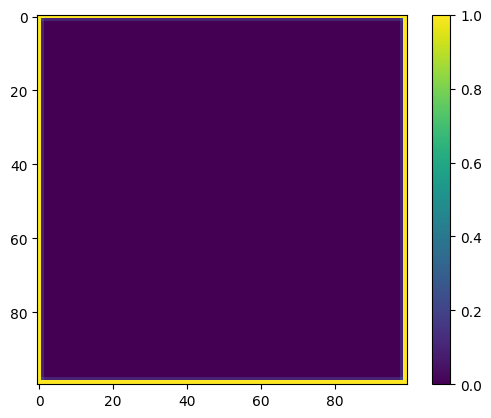

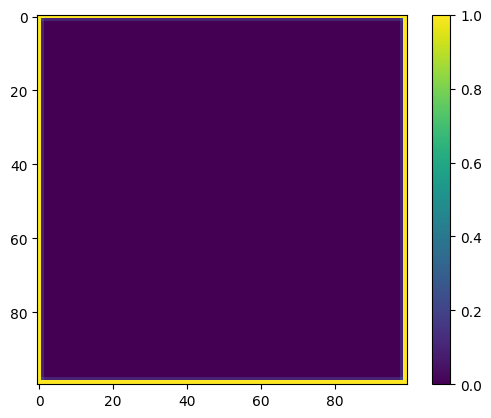

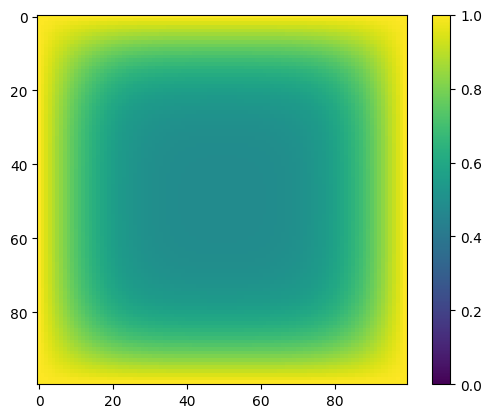

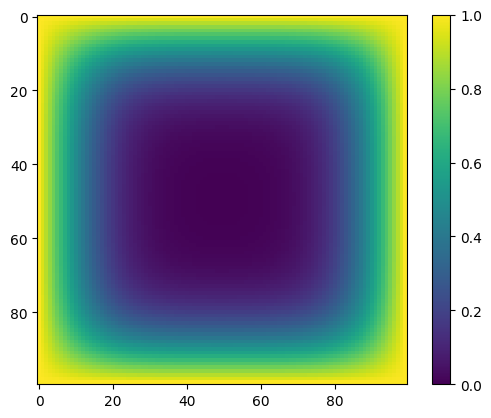

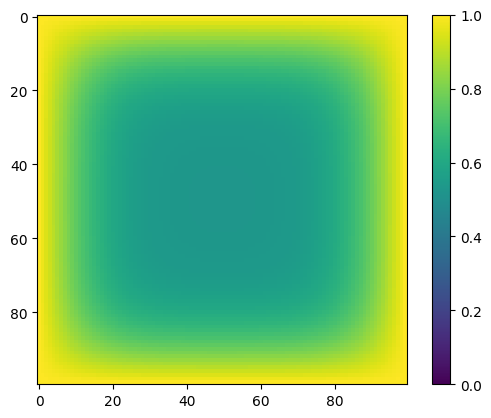

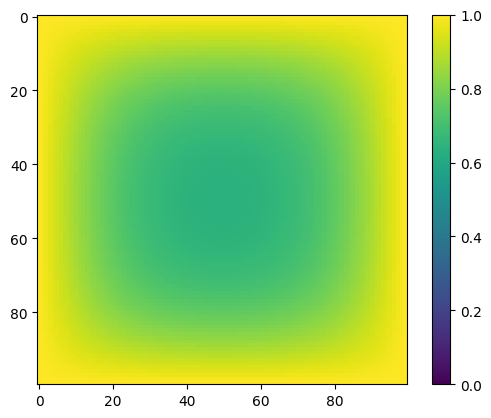

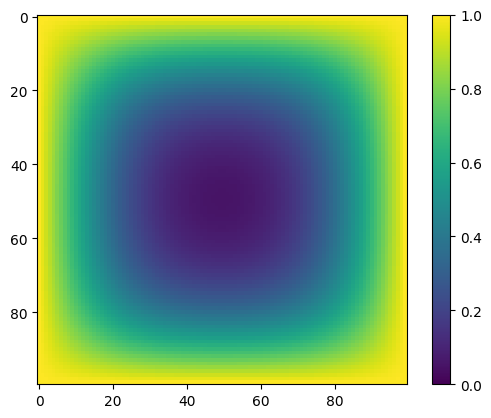

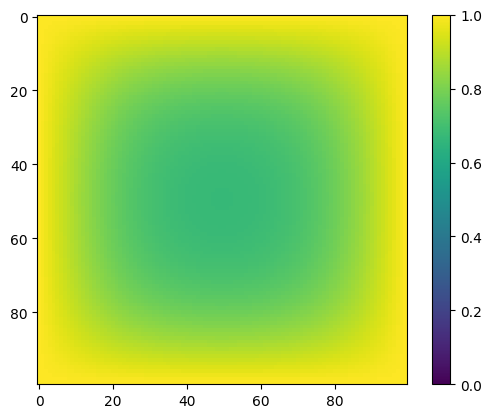

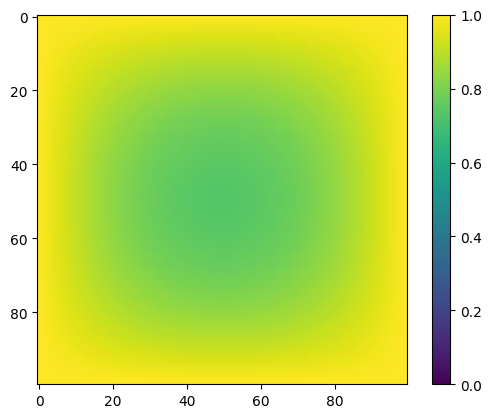

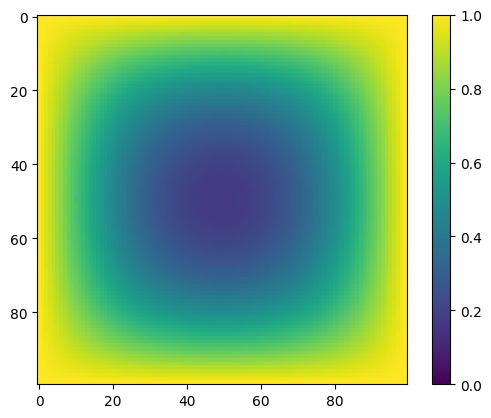

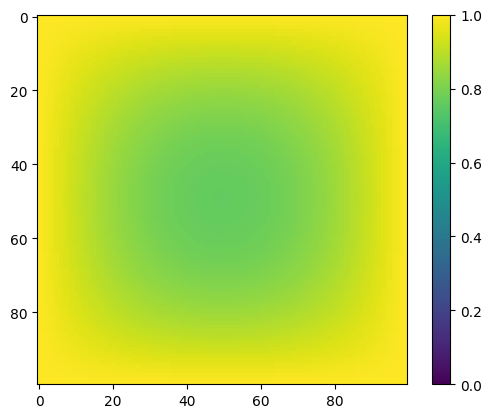

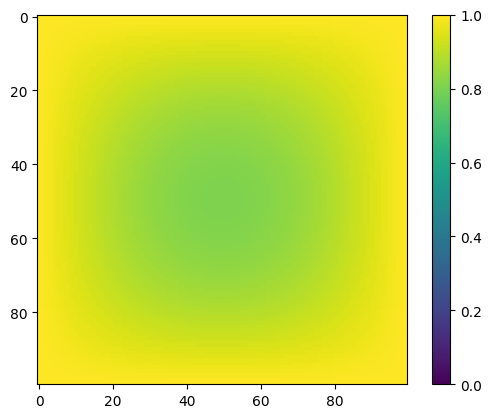

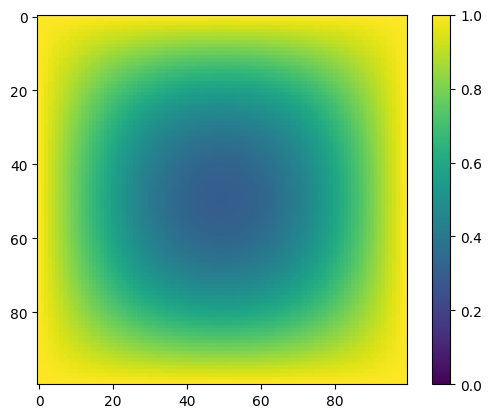

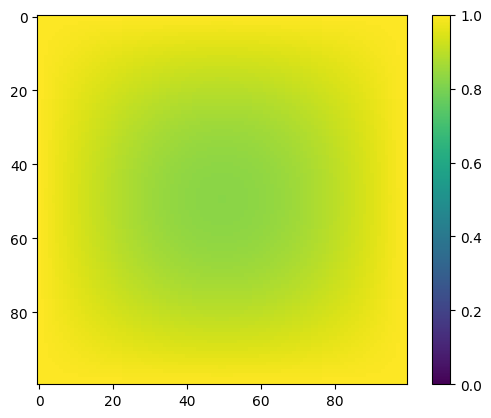

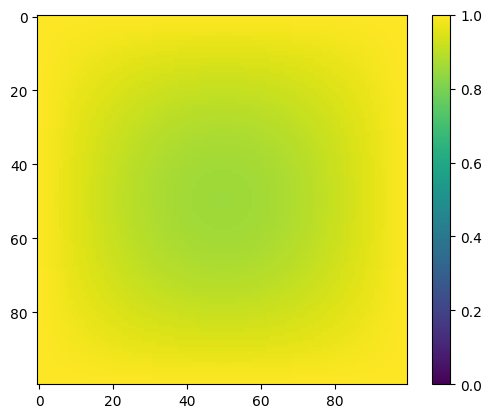

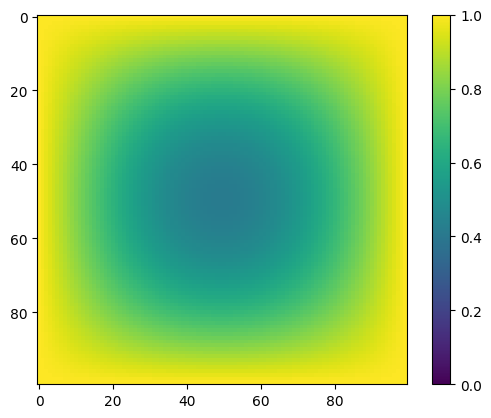

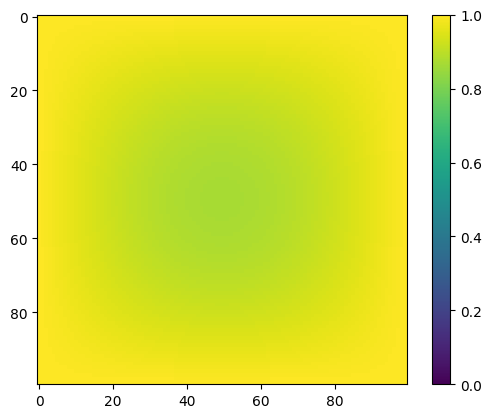

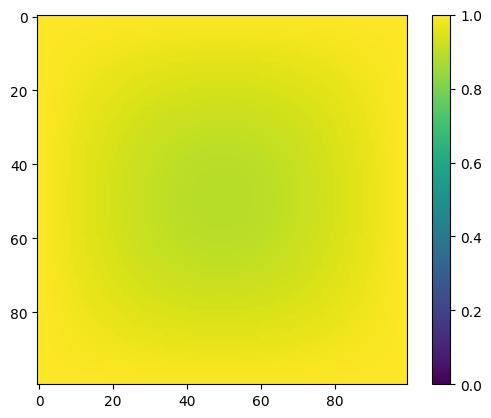

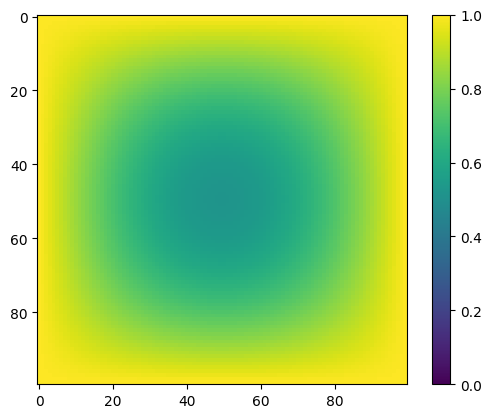

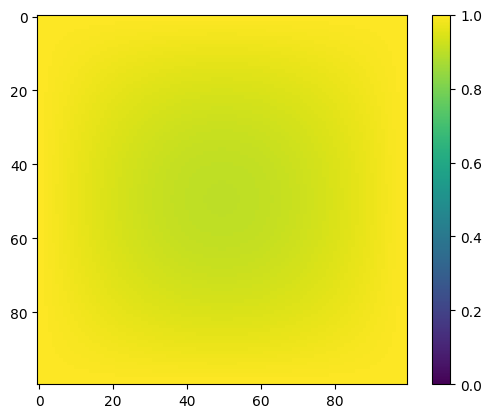

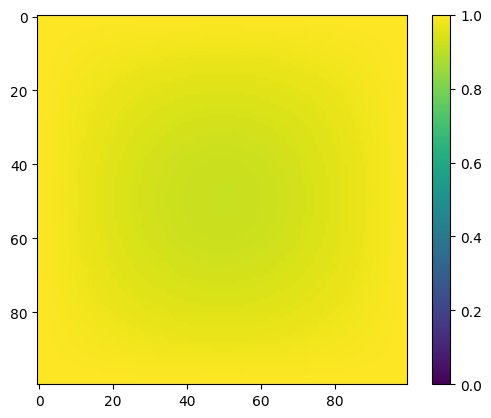

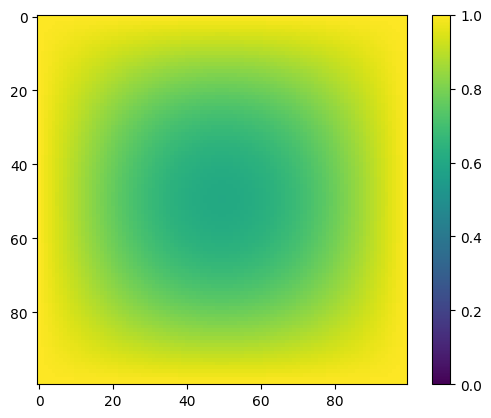

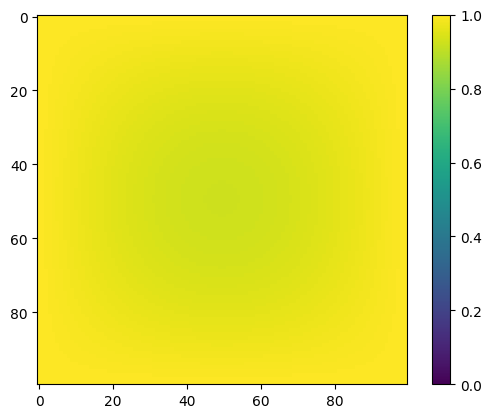

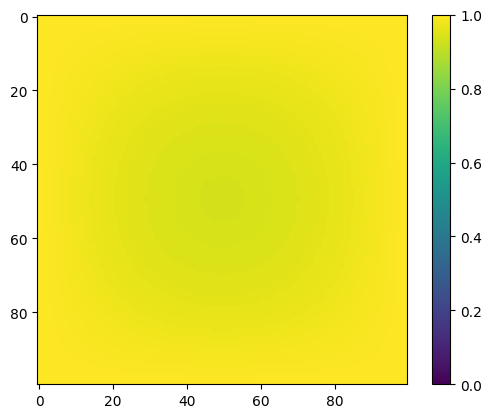

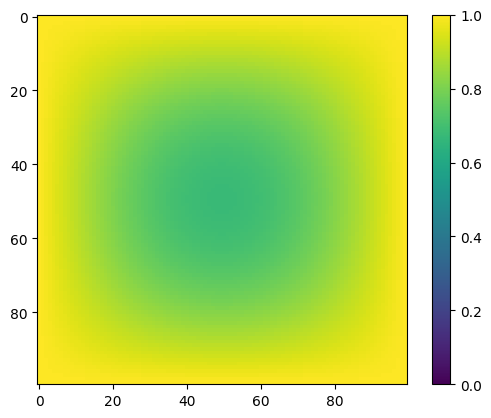

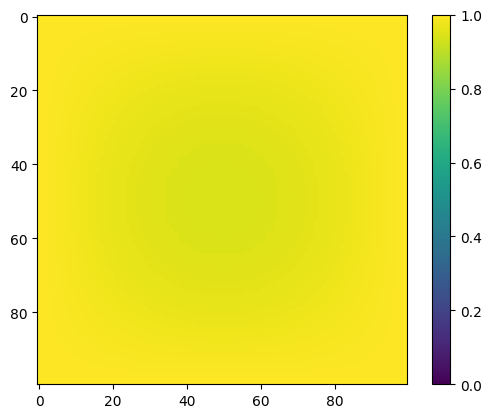

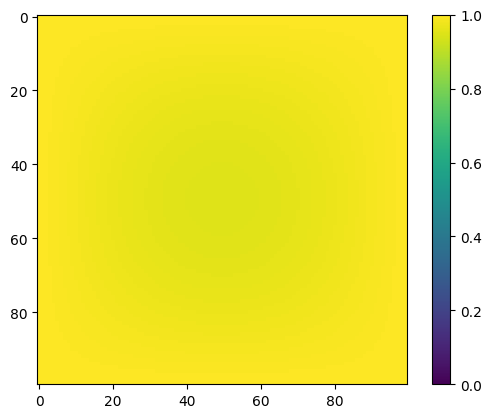

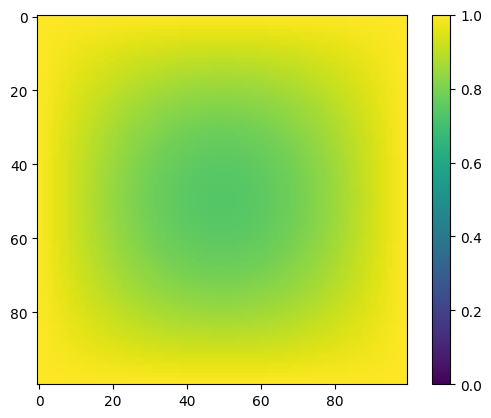

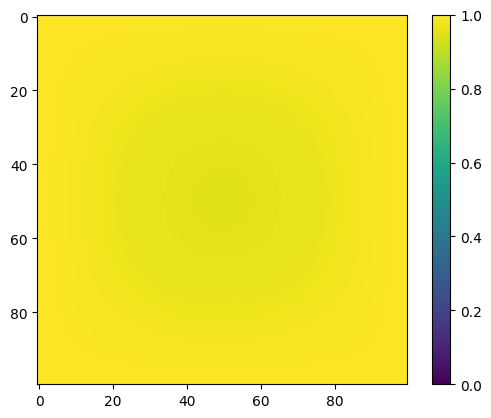

In [1]:
# Run code which will periodically save all of the rod
# Expected execution time is about a minute, writing and reading to disk is the
# time limiting factor here

!nvidia-smi
!nvcc  -o diffusionFull -x cu -lnvToolsExt drive/MyDrive/CUDA/solverSaveFull.cu
!./diffusionFull

import numpy as np
import matplotlib.pyplot as plt

data = np.fromfile("data.dat", dtype=np.float32)
tDim = 100
xDim = 100
yDim = 100
zDim = 1000
data = np.reshape(data,(tDim,zDim,yDim,xDim))
print(data.shape)


for x in range(10):
  plt.figure()
  plt.imshow(data[x*tDim//10,10,:,:], vmin = 0, vmax=1)
  plt.colorbar()
  plt.show()
  plt.figure()
  plt.imshow(data[x*tDim//10,500,:,:], vmin = 0, vmax=1)
  plt.colorbar()
  plt.show()
  plt.figure()
  plt.imshow(data[x*tDim//10,-10,:,:], vmin = 0, vmax=1)
  plt.colorbar()
  plt.show()

Fri Jun  9 13:30:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

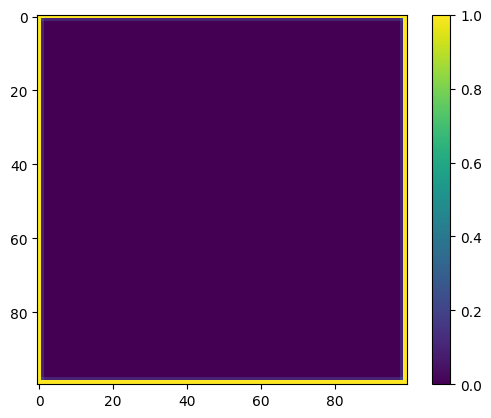

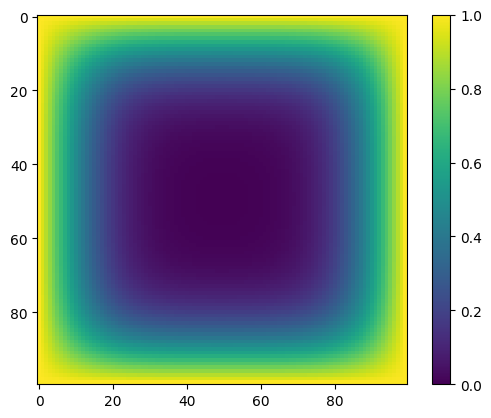

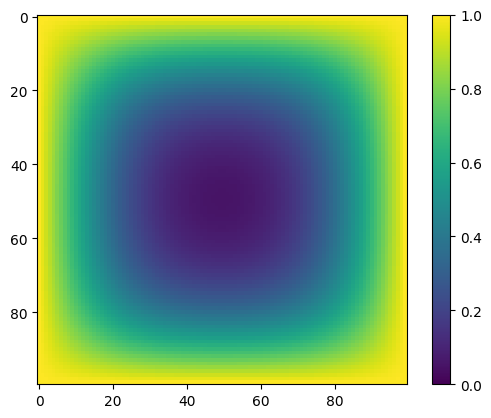

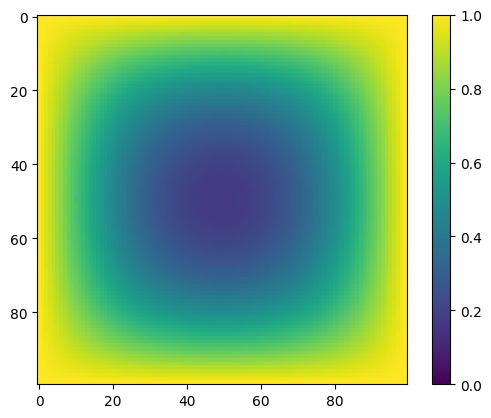

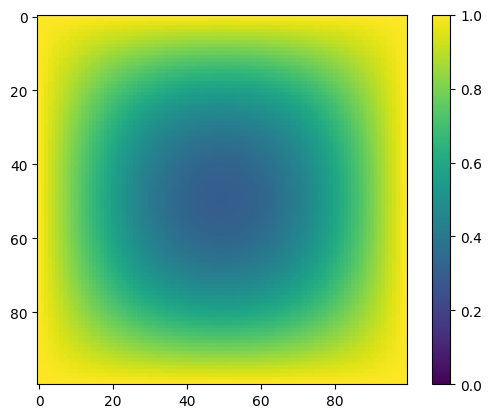

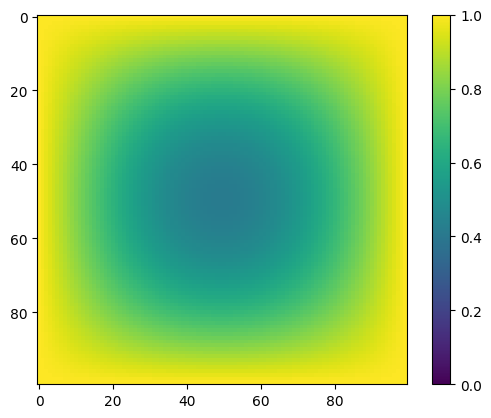

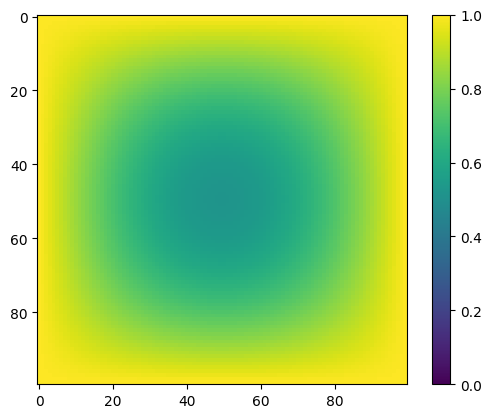

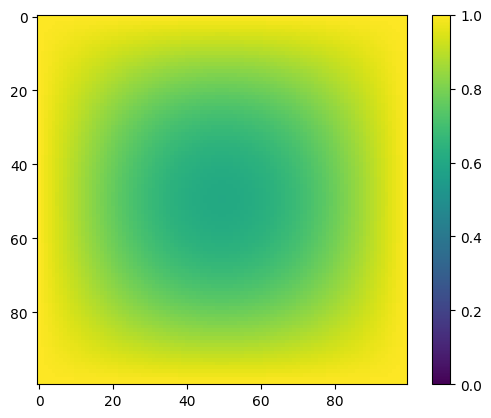

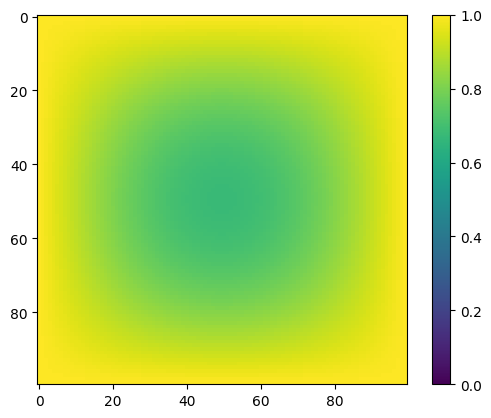

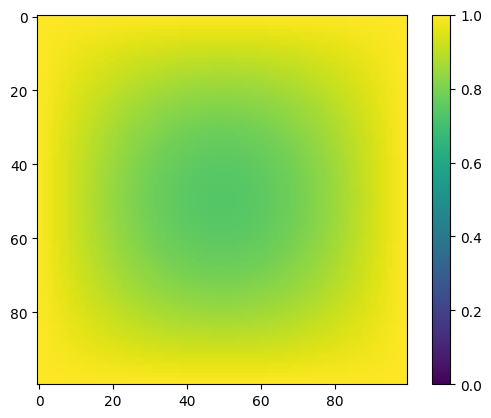

In [3]:
# Run code which will save the center slice in the vertical direction of the
# the rod
# Expected execution time is about about 20 seconds, GPU is most of the time here

!nvidia-smi
!nvcc  -o diffusionSlice -x cu -lnvToolsExt drive/MyDrive/CUDA/solverSaveSlice.cu
!./diffusionSlice

import numpy as np
import matplotlib.pyplot as plt


data = np.fromfile("data.dat", dtype=np.float32)
tDim = 10000
xDim = 100
yDim = 100
data = np.reshape(data,(tDim,yDim,xDim))
print(data.shape)


for x in range(10):
  plt.figure()
  plt.imshow(data[x*tDim//10,:,:], vmin = 0, vmax=1)
  plt.colorbar()
  plt.show()